In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.triangulations import *
from src.fem import build_matricies, solve_fem

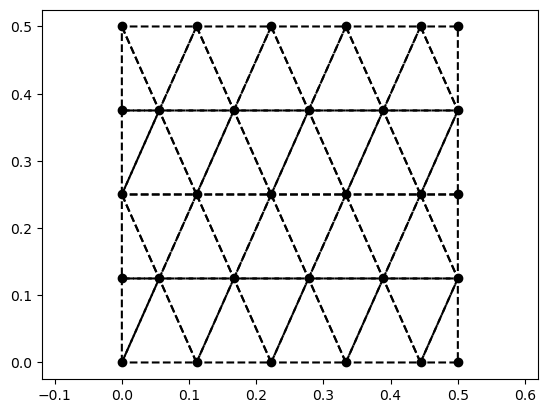

In [10]:
a = 0.5  # width
b = 0.5  # height
N = 10

pts, tris = tri_rectangle(a, b, N)

plt.axis('equal')
plt.plot(pts[:, 0], pts[:, 1], 'ko')
for t in tris:
    plt.plot(pts[t[[0, 1, 2, 0]], 0], pts[t[[0, 1, 2, 0]], 1], 'k--')

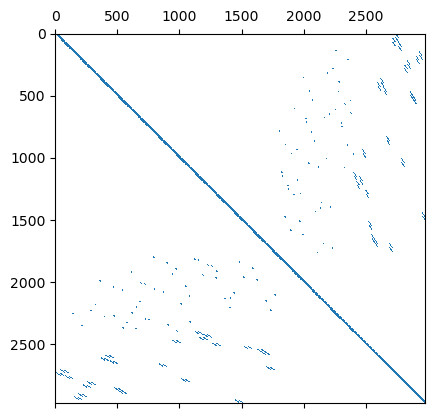

In [20]:
m, n = 10, 5
a = 0.5
N = 10

pts, tris = tri_maze(m, n, a, N)

damp_mat, stiff_mat = build_matricies(pts, tris)

plt.spy(stiff_mat, marker=',')

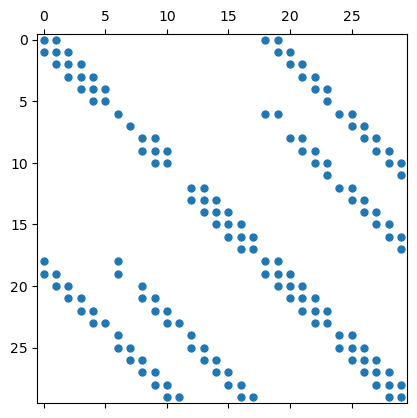

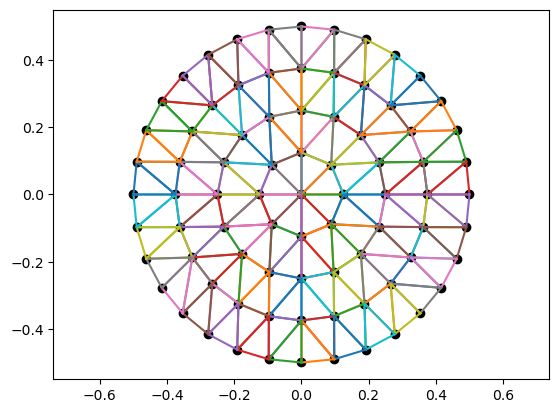

In [3]:
r = 0.5
N = 10

#
pts, tris = tri_circle(r, N)

plt.axis('equal')
plt.plot(pts[:, 0], pts[:, 1], 'ko')
for t in tris:
    plt.plot(pts[t[[0, 1, 2, 0]], 0], pts[t[[0, 1, 2, 0]], 1])

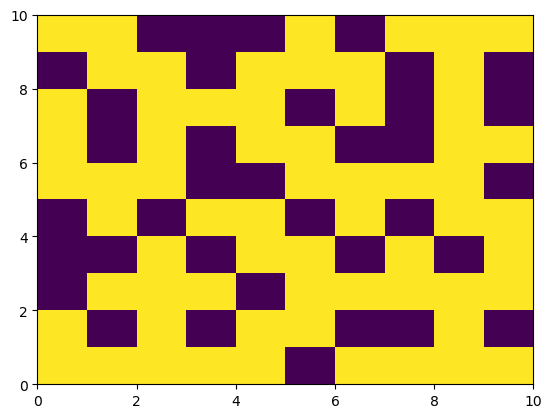

In [4]:
Ng = 10

np.random.seed(1)

def out_of_bounds(i, min, max):
    return i < min or i >= max

def out_of_bounds_2d(i, j, min, max):
    return out_of_bounds(i, min, max) or out_of_bounds(j, min, max)

maze = np.zeros((Ng, Ng))
i, j = 0, 0
maze[i, j] = 1
for _ in range(10000):
    # pick next jump
    ip, jp = [(0, 1), (1, 0), (0, -1), (-1, 0)][np.random.randint(4)]

    ## check if its a valid jump
    # bounds
    if out_of_bounds_2d(i + ip, j + jp, 0, Ng):
        continue
    # is already a 1
    if maze[i + ip, j + jp] == 1:
        i, j = i + ip, j + jp
        continue
    # has any adjacent 1s (except i, j)
    ic, jc = i + 2 * ip, j + 2 * jp
    if not out_of_bounds_2d(ic, jc, 0, Ng) and maze[ic, jc] == 1:
        continue
    ic, jc = i + ip + jp, j + jp + ip
    if not out_of_bounds_2d(ic, jc, 0, Ng) and maze[ic, jc] == 1:
        continue
    ic, jc = i + ip - jp, j + jp - ip
    if not out_of_bounds_2d(ic, jc, 0, Ng) and maze[ic, jc] == 1:
        continue

    i, j = i + ip, j + jp
    maze[i, j] = 1



plt.pcolormesh(maze)

In [5]:
from scipy import spatial

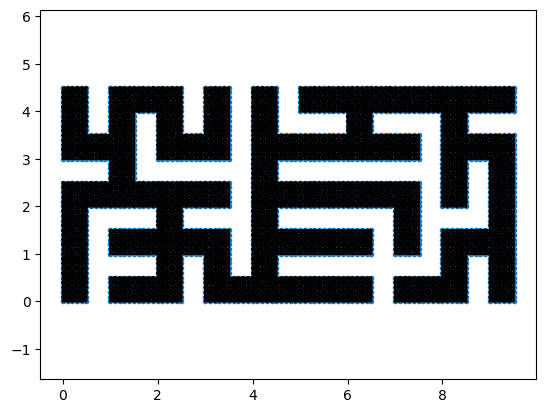

In [19]:
m, n = 10, 5
a = 0.5
N = 10

pts, tris = tri_maze(m, n, a, N)

# plt.pcolormesh(maze)
plt.axis('equal')
plt.plot(pts[:, 0], pts[:, 1], '.')
for t in tris:
    plt.plot(pts[t[[0, 1, 2, 0]], 0], pts[t[[0, 1, 2, 0]], 1], 'k-')